In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pf_data = pd.read_csv('WMT_FB_BP_2014_2017.csv')

In [13]:
pf_data = pf_data.set_index('Date')
pf_data.head()

,WMT,FB,BP
Date,,,
12/31/2013,70.753525,54.650002,37.758350
1/2/2014,70.951355,54.709999,37.268997
1/3/2014,70.717583,54.560001,37.183540
1/6/2014,70.321945,57.200001,37.284527
1/7/2014,70.537735,57.919998,37.711742


In [14]:
pf_data.iloc[0]

WMT    70.753525
FB     54.650002
BP     37.758350
Name: 12/31/2013, dtype: float64

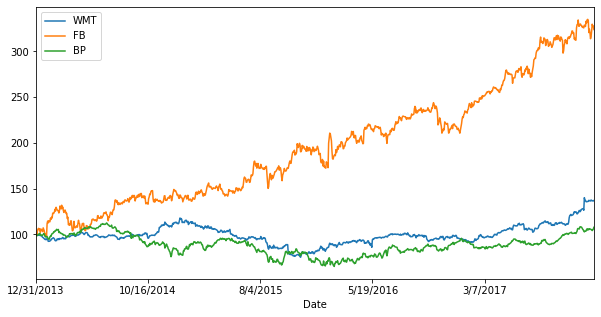

In [15]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [17]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [19]:
log_returns.head()

,WMT,FB,BP
Date,,,
12/31/2013,NaN,NaN,NaN
1/2/2014,0.002792,0.001097,-0.013045
1/3/2014,-0.003300,-0.002745,-0.002296
1/6/2014,-0.005610,0.047253,0.002712
1/7/2014,0.003064,0.012509,0.011393


In [20]:
log_returns.mean()*250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [21]:
log_returns.cov()*250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [22]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [25]:
assets = list(pf_data.columns.values)
num_assets = len(assets)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.39732833, 0.10807205, 0.49459962])

In [26]:
exp_portf_return = np.sum(weights * log_returns.mean()) * 250
exp_portf_return

0.07229419444963138

In [27]:
exp_portf_variance = np.dot(weights.T, np.dot(log_returns.cov()*250, weights))
exp_portf_variance

0.024281012176503584

In [28]:
exp_portf_volat = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
exp_portf_volat

0.15582365730691725

In [30]:
portf_ret = []
portf_vol = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portf_ret.append(np.sum(weights * log_returns.mean())*250)
    portf_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
portf_ret = np.array(portf_ret)
portf_vol = np.array(portf_vol)

In [32]:
portf_ret, portf_vol

(array([0.07897132, 0.24103495, 0.12349581, 0.10495115, 0.0803902 ,
        0.18868552, 0.10497155, 0.15143509, 0.21860247, 0.09142957,
        0.1884045 , 0.16523493, 0.11001779, 0.18646767, 0.18773418,
        0.16085897, 0.15015832, 0.12999052, 0.13081309, 0.10435036,
        0.04950397, 0.06445996, 0.10642064, 0.17825441, 0.17159086,
        0.04503198, 0.14763637, 0.21907848, 0.16682793, 0.19236475,
        0.14891789, 0.25880938, 0.0904866 , 0.10943417, 0.1353152 ,
        0.13196624, 0.04272679, 0.13984317, 0.10719166, 0.15480533,
        0.1818122 , 0.10803831, 0.15603376, 0.17516213, 0.07566044,
        0.17509463, 0.09539128, 0.08002998, 0.14885842, 0.11993198,
        0.13679249, 0.17523552, 0.04618634, 0.18367799, 0.09491724,
        0.11953377, 0.10317437, 0.18395578, 0.12417143, 0.07955126,
        0.07260127, 0.18763179, 0.12817802, 0.12607567, 0.16053495,
        0.05502247, 0.13702195, 0.04940962, 0.19846314, 0.23325559,
        0.24933436, 0.16649797, 0.08043962, 0.09

In [33]:
portfolios = pd.DataFrame({'Returns':portf_ret, 'Volatilities':portf_vol})

In [34]:
portfolios.head()

,Returns,Volatilities
0,0.078971,0.199293
1,0.241035,0.216981
2,0.123496,0.159020
3,0.104951,0.174862
4,0.080390,0.181705


Text(0, 0.5, 'Returns')

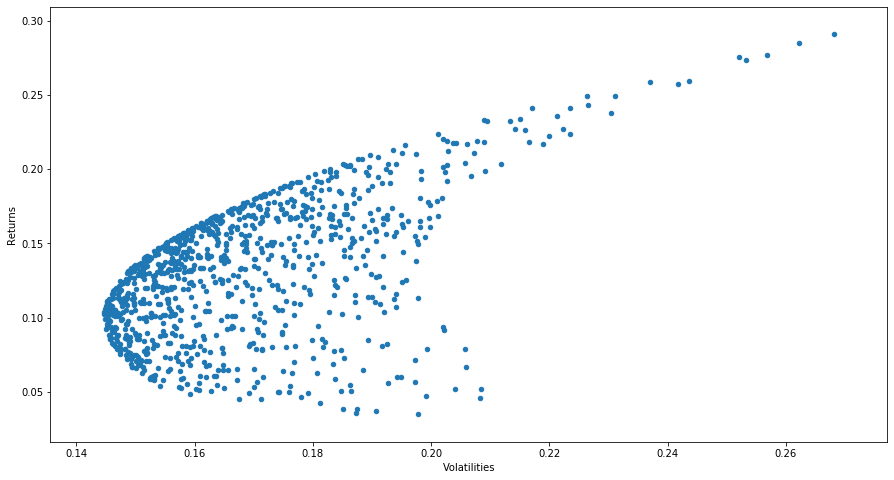

In [37]:
portfolios.plot(x = 'Volatilities', y = 'Returns', kind = 'scatter', figsize = (15,8))
plt.xlabel('Volatilities')
plt.ylabel('Returns')